<a href="https://colab.research.google.com/github/egenc/DataScience_tasks/blob/main/AS24_task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

desc = pd.read_csv("/content/drive/MyDrive/autoScout24/AS24_Data_Description.csv", sep=";")

desc

,column name,description
0,article_id,unique article identifier
1,product_tier,premium status of the article
2,make_name,name of the car manufacturer
3,price,price of the article
4,first_zip_digit,first digit of the zip code of the region the ...
5,first_registration_year,year of the first registration of the article
6,created_date,creation date of the listing
7,deleted_date,deletion date of the listing
8,search_views,number of times the article has been shown as ...
9,detail_views,number of times the article has been clicked on


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/autoScout24/AS24_Case_Study_Data.csv", sep=";")

df.head()

,article_id,product_tier,make_name,price,first_zip_digit,first_registration_year,created_date,deleted_date,search_views,detail_views,stock_days,ctr
0,350625839,Basic,Mitsubishi,16750,5,2013,24.07.18,24.08.18,3091.0,123.0,30,0.03780329990294403
1,354412280,Basic,Mercedes-Benz,35950,4,2015,16.08.18,07.10.18,3283.0,223.0,52,0.06792567773378008
2,349572992,Basic,Mercedes-Benz,11950,3,1998,16.07.18,05.09.18,3247.0,265.0,51,0.0816137973514013
3,350266763,Basic,Ford,1750,6,2003,20.07.18,29.10.18,1856.0,26.0,101,0.014008620689655173
4,355688985,Basic,Mercedes-Benz,26500,3,2014,28.08.18,08.09.18,490.0,20.0,12,0.04081632653061224


### Things need to applied from a first glimpse:
- Dropping article_id column since it is used for indexing
- Dropping also created and deleted date, since stock_days column is present

####Dropping unused columns have direct effect on performance in terms of memory usage, processing time etc.

In [ ]:
## Dropping article_id column since it is used for indexing
## Dropping also created and deleted date, since stock_days column is present
## Dropping unused columns have direct effect on performance in terms of memory usage, processing time etc.
df = df.drop(["article_id", "created_date", "deleted_date"], axis = 1)

df.shape

(78321, 9)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78321 entries, 0 to 78320
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   product_tier             78321 non-null  object 
 1   make_name                78321 non-null  object 
 2   price                    78321 non-null  int64  
 3   first_zip_digit          78321 non-null  int64  
 4   first_registration_year  78321 non-null  int64  
 5   search_views             78311 non-null  float64
 6   detail_views             78311 non-null  float64
 7   stock_days               78321 non-null  int64  
 8   ctr                      78297 non-null  object 
dtypes: float64(2), int64(4), object(3)
memory usage: 5.4+ MB


In [ ]:
df.isnull().sum()

product_tier                0
make_name                   0
price                       0
first_zip_digit             0
first_registration_year     0
search_views               10
detail_views               10
stock_days                  0
ctr                        24
dtype: int64

#### Dropping NaN values

In [ ]:
df = df.dropna()

df.isnull().sum()

product_tier               0
make_name                  0
price                      0
first_zip_digit            0
first_registration_year    0
search_views               0
detail_views               0
stock_days                 0
ctr                        0
dtype: int64

In [ ]:
df.describe()

,price,first_zip_digit,first_registration_year,search_views,detail_views,stock_days
count,78297.000000,78297.000000,78297.000000,78297.00000,78297.000000,78297.000000
mean,15069.670358,4.631876,2011.090336,2297.91333,93.486583,35.995070
std,16375.598837,2.354368,6.538638,6339.52668,228.042547,32.213083
min,50.000000,1.000000,1924.000000,1.00000,0.000000,-3.000000
25%,5750.000000,3.000000,2008.000000,368.00000,13.000000,10.000000
50%,10909.000000,5.000000,2013.000000,920.00000,36.000000,25.000000
75%,18890.000000,7.000000,2015.000000,2234.00000,94.000000,55.000000
max,249888.000000,9.000000,2106.000000,608754.00000,13926.000000,127.000000


# 1) Is it possible to predict the product tier from the information given in the other columns?

This is a classification task.

In [ ]:
print("\u0332".join("NumberOfClasses:"))
print(len(df['product_tier'].unique()))
print("-"*10)
print("value counts per class: \n", df['product_tier'].value_counts())

N̲u̲m̲b̲e̲r̲O̲f̲C̲l̲a̲s̲s̲e̲s̲:
3
----------
value counts per class: 
 Basic      75397
Premium     2324
Plus         576
Name: product_tier, dtype: int64


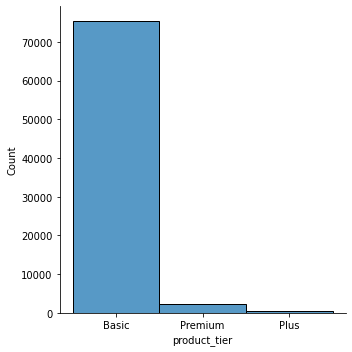

In [ ]:
import seaborn as sns

## Let's plot class distributon
sns.displot(df['product_tier'])

### Dataset looks pretty imbalanced. Let's leave it as it is to have a baseline performance.
Sometimes preliminary results have better performance than preprocessed results.

In [ ]:
## Checking how many different brands there are
print(df['make_name'].unique())

## Creating dictionary by assinging index to each brand
d = {index: value for value, index in enumerate(df['make_name'].unique())}
print("-"*50)
print(d)

['Mitsubishi' 'Mercedes-Benz' 'Ford' 'Volkswagen' 'Fiat' 'Renault' 'Mazda'
 'Peugeot' 'Opel' 'Toyota' 'Jaguar' 'Volvo' 'Dacia' 'MINI' 'Porsche'
 'Nissan' 'BMW' 'Land Rover' 'Audi' 'Citroen' 'Hyundai' 'Suzuki'
 'Alfa Romeo' 'Chevrolet' 'Daewoo' 'Kia' 'Maserati' 'Skoda'
 'Caravans-Wohnm' 'SEAT' 'Honda' 'Daihatsu' 'Chrysler' 'smart' 'Saab'
 'Jeep' 'Others ' 'Lexus' 'Aixam' 'Ligier' 'Lancia' 'Oldtimer' 'Chatenet'
 'Subaru' 'Triumph' 'Ferrari' 'Rolls-Royce' 'Dodge' 'MG' 'Cadillac'
 'DS Automobiles' 'Iveco' 'Bentley' 'SsangYong' 'Tesla' 'Trucks-Lkw' 'TVR'
 'Aston Martin' 'Abarth' 'HUMMER' 'Lincoln' 'Isuzu' 'Microcar' 'Buick'
 'AC' 'Alpina' 'Corvette' 'McLaren' 'Rover' 'Austin' 'De Tomaso' 'FISKER'
 'Infiniti' 'Lotus' 'Morgan' 'GMC' 'Oldsmobile' 'Donkervoort' 'Alpine'
 'Daimler' 'Lamborghini' 'Grecav' 'Casalini' 'Pontiac' 'MAN' 'Piaggio'
 'Amphicar' 'Tata' 'DFSK' 'Kawasaki' 'KTM']
--------------------------------------------------
{'Mitsubishi': 0, 'Mercedes-Benz': 1, 'Ford': 2, 'Volkswagen':

### After getting the general overview about the data, here some of the points:
- ML Algorithms accepts numerical data as input, therefore, **make_name** column should be encoded.
- Labels should also be replaced by numerical values. (**product_tier** column)
- **ctr column** consists of strings in which some values cannot be converted to float. **converter** function will do the job in this regard. There are some strings like '01 Apr' which are inconvertable. Replacing them with 0.

In [ ]:
## ML Algorithms accepts numerical data as input, therefore, make_name column should be encoded.
## Labels should also be replaced by numerical values.
## This is why dictionary d is prepared.

## LabelEncoder from sklearn library can also be used for this process.

df_last = df.replace({'make_name':d, 'product_tier':{'Basic':0,'Premium':1,'Plus':2}})

## ctr column consists of strings in which some values cannot be converted to float
## converter function will do the job in this regard
## There are some strings like '01 Apr' which are inconvertable. Replacing them with 0
def converter(text):
  try:
    return float(text)
  except ValueError:
    try:
      return float(text.replace(".",""))
    except ValueError:
      return 0

df_last['ctr'] = df_last.apply(lambda row: converter(row['ctr']), axis = 1)

df_last

,product_tier,make_name,price,first_zip_digit,first_registration_year,search_views,detail_views,stock_days,ctr
0,0,0,16750,5,2013,3091.0,123.0,30,0.037803
1,0,1,35950,4,2015,3283.0,223.0,52,0.067926
2,0,1,11950,3,1998,3247.0,265.0,51,0.081614
3,0,2,1750,6,2003,1856.0,26.0,101,0.014009
4,0,1,26500,3,2014,490.0,20.0,12,0.040816
...,...,...,...,...,...,...,...,...,...
78316,0,37,15740,8,2014,6895.0,230.0,99,0.033358
78317,0,20,2950,6,2006,1175.0,16.0,25,0.012936
78318,0,3,7850,8,2014,448.0,21.0,16,0.046875
78319,0,9,13945,5,2011,1617.0,29.0,28,0.017934


### After preparing data, it is time to split into train/test.

In [ ]:
from sklearn.model_selection import train_test_split

X = df_last.drop(columns = ['product_tier'],axis=1)
Y = df_last['product_tier']

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=48)

In [ ]:
## Let's print shapes

print("X_train shape =", X_train.shape)
print("X_test shape =", X_test.shape)
print("Y_train shape =", Y_train.shape)
print("Y_test shape =", Y_test.shape)

X_train shape = (62637, 8)
X_test shape = (15660, 8)
Y_train shape = (62637,)
Y_test shape = (15660,)


## Firstly, Random Forest. 
Even though it operates like a black box, it sometimes can be useful to observe feature importance.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

## Firstly, I would like to go with Random Forest. Even though it operates like a black box,
## it sometimes can be useful to observe feature importance.

clf = RandomForestClassifier(max_depth=50, random_state=0)
clf.fit(X_train, Y_train)

RandomForestClassifier(max_depth=50, random_state=0)

In [ ]:
## Feature importances
imp = dict(zip(X.columns, clf.feature_importances_))
imp

{'ctr': 0.13922573253659984,
 'detail_views': 0.14955198405585265,
 'first_registration_year': 0.06846117472620905,
 'first_zip_digit': 0.050327146055770385,
 'make_name': 0.06881731527683395,
 'price': 0.11168292640413989,
 'search_views': 0.23757895357634523,
 'stock_days': 0.17435476736824893}

### Since dataset is imbalanced, proper evaluation metrics should be used. F1 score is one of them:

In [ ]:
from sklearn.metrics import classification_report

# Make predictions for the test set
y_pred_test = clf.predict(X_test)

print(classification_report(Y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99     15095
           1       0.82      0.42      0.55       451
           2       0.00      0.00      0.00       114

    accuracy                           0.97     15660
   macro avg       0.60      0.47      0.51     15660
weighted avg       0.96      0.97      0.97     15660



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.metrics import confusion_matrix

confusion_matrix(Y_test, y_pred_test)

array([[15057,    38,     0],
       [  263,   188,     0],
       [  112,     2,     0]])

#### As it is seen above (warnings & results), metrics for Class 2 is 0. 

### Random forests might be a simple method and cannot find patterns in the data. A more sophisticated approach might be used. In this case, I preferred using **LSTMs**:

In [ ]:
## LSTM model
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Dense, LSTM, Flatten, Conv2D, Bidirectional, Conv1D, TimeDistributed
from tensorflow.keras import Sequential

X_train = np.expand_dims(X_train, axis = 1) ## Change Axis to 1 for LSTM Input
X_test = np.expand_dims(X_test, axis = 1) ## Change Axis to 1 for LSTM Input
# y_train = np.expand_dims(Y_train, axis = 1) 
# y_test = np.expand_dims(Y_test, axis = 1)

def lstm_model():
  model = Sequential()
  model.add(LSTM(16, dropout = 0.2, return_sequences=True))
  model.add(LSTM(32, dropout=0.3, recurrent_dropout=0.3))
  # model.add(Dense(24)) ## Just to check if Fully connected layer helps -- (*Didnt help)
  model.add(Dense(1))
  opt = tf.keras.optimizers.Adam()
  model.compile(optimizer=opt,  loss=tf.keras.losses.MeanAbsoluteError())
  return model

model = lstm_model()

history = model.fit(X_train, Y_train, epochs = 10, batch_size=100000)

model.evaluate(X_test, Y_test)

Epoch 1/10
1/1 [==============================] - 7s 7s/step - loss: 0.0938
Epoch 2/10
1/1 [==============================] - 0s 418ms/step - loss: 0.0885
Epoch 3/10
1/1 [==============================] - 0s 479ms/step - loss: 0.0831
Epoch 4/10
1/1 [==============================] - 0s 440ms/step - loss: 0.0786
Epoch 5/10
1/1 [==============================] - 1s 664ms/step - loss: 0.0764
Epoch 6/10
1/1 [==============================] - 1s 739ms/step - loss: 0.0747
Epoch 7/10
1/1 [==============================] - 1s 686ms/step - loss: 0.0731
Epoch 8/10
1/1 [==============================] - 1s 850ms/step - loss: 0.0720
Epoch 9/10
1/1 [==============================] - 1s 775ms/step - loss: 0.0710
Epoch 10/10
490/490 [==============================] - 4s 5ms/step - loss: 0.0600


0.05996692180633545

### Classification metrics can't handle a mix of multiclass and continuous targets. Hence, I need to make some adjustments on the predictions.

In [ ]:
y_pred_test_lstm = model.predict(X_test)

predictions = []

for ele in y_pred_test_lstm:
  if ele[0]<0.5:
    predictions.append(0)
  elif ele[0]>0.5 and ele[0]<1.5:
    predictions.append(1)
  else:
    predictions.append(2)


print(classification_report(Y_test, predictions))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98     15095
           1       0.00      0.00      0.00       451
           2       0.00      0.00      0.00       114

    accuracy                           0.96     15660
   macro avg       0.32      0.33      0.33     15660
weighted avg       0.93      0.96      0.95     15660



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
max(y_pred_test_lstm)

array([0.03110525], dtype=float32)

In [ ]:
from sklearn.metrics import confusion_matrix

confusion_matrix(Y_test, predictions)

array([[15095,     0,     0],
       [  451,     0,     0],
       [  114,     0,     0]])

LSTMs made it even worse, it didnt even classify the second and third class at all. Further steps should be taken.

-------------------------------------------------------------------------------------

# 2) Is it possible to predict detail views from the information given in the other columns?

A regression problem.

In [ ]:
X_reg = df_last.drop(columns = ['detail_views'],axis=1)
Y_reg = df_last['detail_views']

X_train_reg, X_test_reg, Y_train_reg, Y_test_reg = train_test_split(X_reg, Y_reg, test_size=0.2, random_state=48)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

regr = RandomForestRegressor(max_depth=50, random_state=0)
regr.fit(X_train_reg, Y_train_reg)

RandomForestRegressor(max_depth=50, random_state=0)

In [ ]:
## Feature importances
imp = dict(zip(X_reg.columns, regr.feature_importances_))
imp

{'ctr': 0.2130175614097608,
 'first_registration_year': 0.0019076315528594556,
 'first_zip_digit': 0.0022947016717745072,
 'make_name': 0.0018030376267046447,
 'price': 0.005095661301820719,
 'product_tier': 0.0004827144151041265,
 'search_views': 0.7731831577717049,
 'stock_days': 0.0022155342502710356}

It looks like search_views has the biggest impact.

In [ ]:
from sklearn.metrics import mean_absolute_error
import warnings


with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    y_pred_test = clf.predict(X_test_reg)

## using mean_absolute_error for regression problems
print(mean_absolute_error(Y_test_reg, y_pred_test))

91.37075351213282


Error rate is quite high. It certainly needs preprocessing and understanding of data.

Using only important features might be a good idea.

**Let's also try with LSTMs:**

In [ ]:
X_train_reg = np.expand_dims(X_train_reg, axis = 1) ## Change Axis to 1 for LSTM Input
X_test_reg = np.expand_dims(X_test_reg, axis = 1) ## Change Axis to 1 for LSTM Input
# y_train = np.expand_dims(Y_train, axis = 1) 
# y_test = np.expand_dims(Y_test, axis = 1)

def lstm_model():
  model = Sequential()
  model.add(LSTM(16, dropout = 0.2, return_sequences=True))
  model.add(LSTM(32, dropout=0.3, recurrent_dropout=0.3))
  # model.add(Dense(24)) ## Just to check if Fully connected layer helps -- (*Didnt help)
  model.add(Dense(1))
  opt = tf.keras.optimizers.Adam()
  model.compile(optimizer=opt,  loss=tf.keras.losses.MeanAbsoluteError())
  return model

model = lstm_model()

history = model.fit(X_train_reg, Y_train_reg, epochs = 10, batch_size=100000)

model.evaluate(X_test_reg, Y_test_reg)

Epoch 1/10
1/1 [==============================] - 7s 7s/step - loss: 94.0286
Epoch 2/10
1/1 [==============================] - 0s 409ms/step - loss: 94.0179
Epoch 3/10
1/1 [==============================] - 0s 427ms/step - loss: 94.0070
Epoch 4/10
1/1 [==============================] - 0s 414ms/step - loss: 93.9966
Epoch 5/10
1/1 [==============================] - 0s 413ms/step - loss: 93.9855
Epoch 6/10
1/1 [==============================] - 0s 406ms/step - loss: 93.9747
Epoch 7/10
1/1 [==============================] - 0s 403ms/step - loss: 93.9636
Epoch 8/10
1/1 [==============================] - 0s 422ms/step - loss: 93.9513
Epoch 9/10
1/1 [==============================] - 0s 408ms/step - loss: 93.9386
Epoch 10/10
490/490 [==============================] - 2s 2ms/step - loss: 91.2716


91.27162170410156

Using an advanced model did not perform as expected. Further steps should be taken for this problem.

## Next Steps:
After getting some preliminary results, theese would be further approaches I would take:
- (Classification) Trimming the dataset for balancing dataset via:
```
for product in df1['product_tier'].unique():
  rand = random.randint(550,650)
  tmp = df1[df1.product_tier == product].iloc[:rand]
  df = pd.concat([df, tmp])
```
Third class (**Plus** label) has 576 samples, hence, setting class size between (550,650)

- (Both) Using specific columns only, selecting them according to feature importance (i. e. top-3) as displayed above. 

- (Both) Differrent approaches can be applied such as Naive Bayes, SVMs-SVRs, kNNs, or even MLP.
(Regression)
I would first try Naive Bayes since it assumes that each input variable is independent.

- (Both) Preprocessing data as whole and/or column-wise via:
  - StandardScaler
  - MinMaxScaler
  - MaxAbsScaler

- (Classification) While trimming, resampling from dominant class.

- (Both) Building a custom model(s):
  - Optimizing hyperparameters and decreasing numberr of units for LSTMs could be tried.
  - Employing RNNs couuld be an option, which is more sophisticated than conventional ML approaches and less complicated than LSTMs. 
  - SoTA models can also be used such as BERT (and derivatives) despite of being costly.

- (Both) Generating synthetic data for imbalanced class (**Class 2**) using such as **CTGANs** and **SDV** libraries.

- (Both) Using Ensemble and Boosting Algorithms: GradientBoosting, LightGBM, and XGBoost


## In Conclusion
1) Classification

I do think that  this dataset is decent to get good results. Here are indicators for this:
- When data is abundant (class 0), F1 score is over 95%.
- Outliers of each class is not that different from each other. Thus, we are not that far from best.

2) Regression

It seems like a more complicated problem than classification. Mean of errors is quite high. 
- Robust preprocessing steps are needed.
 - Grouping similar inputs into clusters using KMeans.
 - Using a few brand names instead of all of them. If using a few brand names solve the problem, then that is an improvement.
 - Removing zip code info and checking the result (location independent). In contrary, instead of using zip codes, merging fusing them into 4 routes or more (i. e. north, west, south, east) to shrink the size.
- Having more data might affect prominently.
- Using different losses and observing their results are required. (i.e root-mean-square error)

## From my experience, I have solved even more complex problems by applying the steps I wrote above. In addition, I am sure there are great people in AutoScout24 for brainstorming, which might lead us to propose even better methods.

## Please let me know if more explanation is needed. I can explain this notebook line by line via whys and hows.

# Thank you for reading :)